<a href="https://colab.research.google.com/github/shadhavk/sentiment-analysis/blob/main/twitter_sentiment_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df2=pd.read_csv("/content/twitter_validation.csv")

In [ ]:
df2.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [ ]:
df2.describe()

,3364
count,999.000000
mean,6435.159159
std,3728.912226
min,6.000000
25%,3241.500000
50%,6560.000000
75%,9662.500000
max,13197.000000


In [ ]:
df1=pd.read_csv("/content/twitter_training.csv")

In [ ]:
df1.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15836 entries, 0 to 15835
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   15836 non-null  int64 
 1   Borderlands                                            15836 non-null  object
 2   Positive                                               15836 non-null  object
 3   im getting on borderlands and i will murder you all ,  15675 non-null  object
dtypes: int64(1), object(3)
memory usage: 495.0+ KB


In [ ]:
df1.shape

(15836, 4)

In [ ]:
df2.shape

(999, 4)

In [ ]:
df1=df1.rename(columns={"Positive":"result", "im getting on borderlands and i will murder you all ," : "tweets"})
df1 = df1.drop(columns=['2401','Borderlands'])

In [ ]:
df2=df2.rename(columns={"Irrelevant":"result", "I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣":"tweets"})
df2=df2.drop(columns=['3364', 'Facebook'])

In [ ]:
df1.head()

,result,tweets
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [ ]:
df2.head()

,result,tweets
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
df2.sample(3)

,result,tweets
331,Negative,Not this again
600,Neutral,Morning~!!\nI'm split on playing PSO2 or Borde...
119,Negative,What the fuck is wrong with u guys?\n@DOTA2


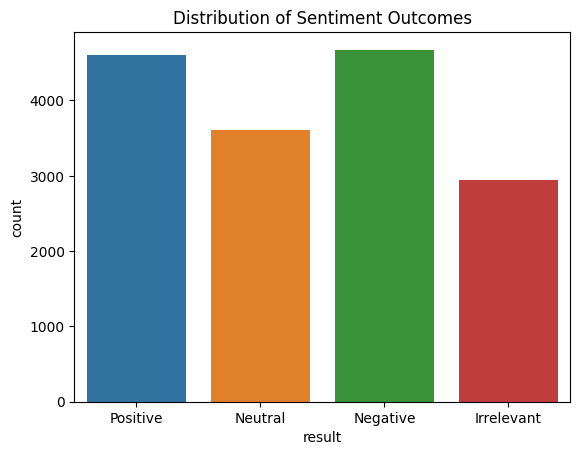

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='result', data=df1)
plt.title('Distribution of Sentiment Outcomes')
plt.show()

In [ ]:
df1_irr = df1.loc[df1["result"]=='Irrelevant']
df1_irr_index = df1_irr.index
df1 = df1.drop(labels=df1_irr_index, axis=0)
df1["result"].value_counts()

Negative    4674
Positive    4607
Neutral     3612
Name: result, dtype: int64

In [ ]:
df2_irr=df2.loc[df2['result']=='Irrelevant']
df2_irr_index=df2_irr.index
df2=df2.drop(labels=df2_irr_index, axis=0)
df2['result'].value_counts()

Neutral     285
Positive    277
Negative    266
Name: result, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['result']= encoder.fit_transform(df1['result'])
# For Testing Dataset
df2['result']= encoder.fit_transform(df2['result'])
# 1 = Neutral, 2= Positive, 0=Negative

In [ ]:
df1.head()

,result,tweets
0,2,I am coming to the borders and I will kill you...
1,2,im getting on borderlands and i will kill you ...
2,2,im coming on borderlands and i will murder you...
3,2,im getting on borderlands 2 and i will murder ...
4,2,im getting into borderlands and i can murder y...


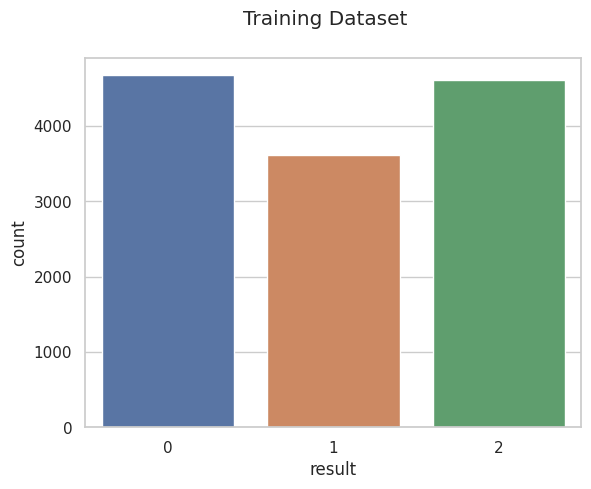

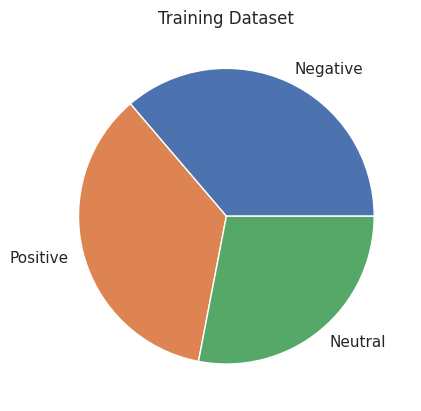

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df1["result"])
plt.suptitle("Training Dataset")
plt.show()
plt.pie(df1['result'].value_counts(), labels = ['Negative', 'Positive', 'Neutral' ])
plt.title("Training Dataset")
plt.show()

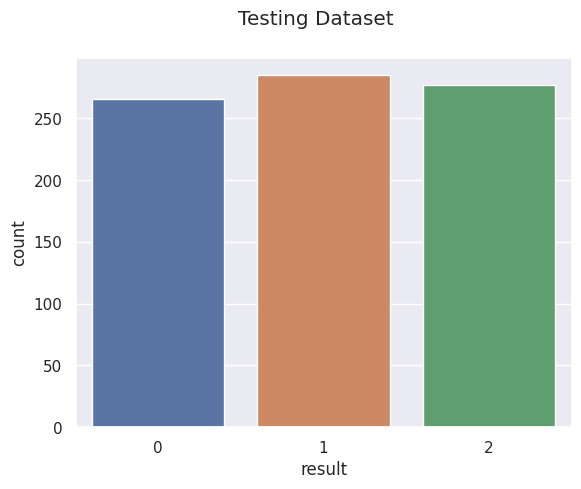

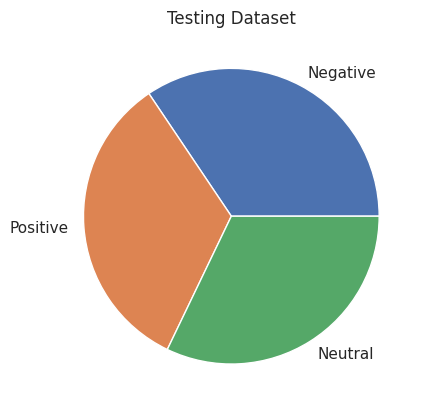

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x=df2["result"])
plt.suptitle("Testing Dataset")
plt.show()
plt.pie(df2['result'].value_counts(), labels = ['Negative', 'Positive', 'Neutral' ])
plt.title("Testing Dataset")
plt.show()

In [ ]:
# text preprocessing
import nltk
nltk.download("stopwords")
# nltk.download("PorterStemmer")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stopwords.words('english')
ps = PorterStemmer()
import string

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocessing(text):
    text = str(text)
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation and i.isalnum():
            y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
df1['preprocessed'] = df1['tweets'].apply(preprocessing)
df2['preprocessed'] = df2['tweets'].apply(preprocessing)

In [ ]:
# Save the training dataframe to a CSV file
df1.to_csv("training_dataset_preprocessed.csv", index=False)
# Save the testing dataframe to a CSV file
df2.to_csv("testing_dataset_preprocessed.csv", index=False)

In [ ]:
df1.head()

,result,tweets,preprocessed
0,2,I am coming to the borders and I will kill you...,come border kill
1,2,im getting on borderlands and i will kill you ...,im get borderland kill
2,2,im coming on borderlands and i will murder you...,im come borderland murder
3,2,im getting on borderlands 2 and i will murder ...,im get borderland 2 murder
4,2,im getting into borderlands and i can murder y...,im get borderland murder


In [ ]:
# Load the new preprocessed dataset
df_test_preprocessed = pd.read_csv('testing_dataset_preprocessed.csv').astype(str)
df_train_preprocessed = pd.read_csv('training_dataset_preprocessed.csv').astype(str)

In [ ]:
df_test_preprocessed.head()

,result,tweets,preprocessed
0,1,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezo reject claim co...
1,0,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word function poorli samsungu ch...
2,0,"CSGO matchmaking is so full of closet hacking,...",csgo matchmak full closet hack truli aw game
3,1,Now the President is slapping Americans in the...,presid slap american face realli commit unlaw ...
4,0,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp madelein mccann cellar past 13 year ...


In [ ]:
df_train_preprocessed.head()

,result,tweets,preprocessed
0,2,I am coming to the borders and I will kill you...,come border kill
1,2,im getting on borderlands and i will kill you ...,im get borderland kill
2,2,im coming on borderlands and i will murder you...,im come borderland murder
3,2,im getting on borderlands 2 and i will murder ...,im get borderland 2 murder
4,2,im getting into borderlands and i can murder y...,im get borderland murder


In [ ]:
# vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X_Train = cv.fit_transform(df_train_preprocessed['preprocessed']).toarray()
X_Train.shape

(12893, 7295)

In [ ]:
Y_Train = df_train_preprocessed['result'].values
Y_Train.shape

(12893,)

In [ ]:
X_Test = cv.transform(df_test_preprocessed['preprocessed']).toarray()
X_Test.shape

(828, 7295)

In [ ]:
Y_Test = df_test_preprocessed['result'].values
Y_Test.shape

(828,)

In [ ]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    GaussianNB()]

In [ ]:
#dense_features=X_Train
#dense_test= X_Test
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(X_Train,Y_Train)
        pred = fit.predict(X_Test)
    except Exception:
        fit = classifier.fit(Y_Train,Y_Train)
        pred = fit.predict(X_Test)
    accuracy = accuracy_score(pred,Y_Test)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

Accuracy of LogisticRegressionis 0.4746376811594203
Accuracy of DecisionTreeClassifieris 0.6014492753623188
Accuracy of RandomForestClassifieris 0.6256038647342995
Accuracy of GaussianNBis 0.5036231884057971


In [ ]:
result = pd.DataFrame({'Models':Model})
result['Accuracy'] = Accuracy
result = result.sort_values(by='Accuracy',ascending=False)
result

,Models,Accuracy
2,RandomForestClassifier,0.625604
1,DecisionTreeClassifier,0.601449
3,GaussianNB,0.503623
0,LogisticRegression,0.474638
